In [ ]:
from datetime import datetime
print("last update: {}".format(datetime.now())) 

last update: 2023-04-21 10:43:51.133378


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/PlantDoc.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp/PlantDOC') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
file_path = '/tmp/PlantDOC/PlantDoc'

In [ ]:
name_class = os.listdir(file_path)
name_class

['Corn leaf blight', 'Corn Healthy', 'Corn Gray leaf spot', 'Corn rust leaf']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/tmp/PlantDOC/PlantDoc/Corn leaf blight/P1000367.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/dsc5582.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/Figure%202.JPG.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/corn-several-Holcus%20spot%20lesions-f4.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/corn-bacterial-leaf-streak-f4.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/NorthernCornLeafBlight.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/img_5593211e4bf88_49361.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/img_0099-2.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/corn-short-backlit-Xanth-lesions-halos-f2.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/ga-2015-05-20-nclb.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/Fig1_Northern_corn_leaf_blight.JPG.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/corn-mature-bacterial-leaf-streak.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/nclb4x1200.jpg',
 '/tmp/PlantDOC/PlantDoc/Corn leaf blight/nclb3_rob_factsheetimage.jpg',
 '

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf blight',
 'Corn leaf b

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/tmp/PlantDOC/PlantDoc/Corn rust leaf/southern...,Corn rust leaf
1,/tmp/PlantDOC/PlantDoc/Corn Healthy/image (200...,Corn Healthy
2,/tmp/PlantDOC/PlantDoc/Corn Healthy/image (77)...,Corn Healthy
3,/tmp/PlantDOC/PlantDoc/Corn leaf blight/ncorn_...,Corn leaf blight
4,/tmp/PlantDOC/PlantDoc/Corn Gray leaf spot/cp_...,Corn Gray leaf spot


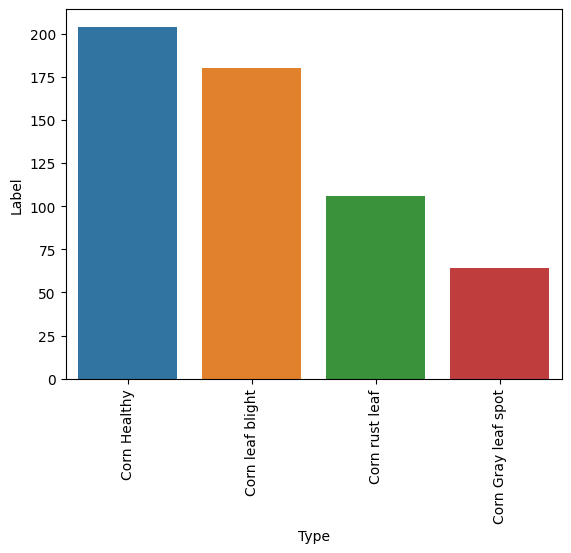

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

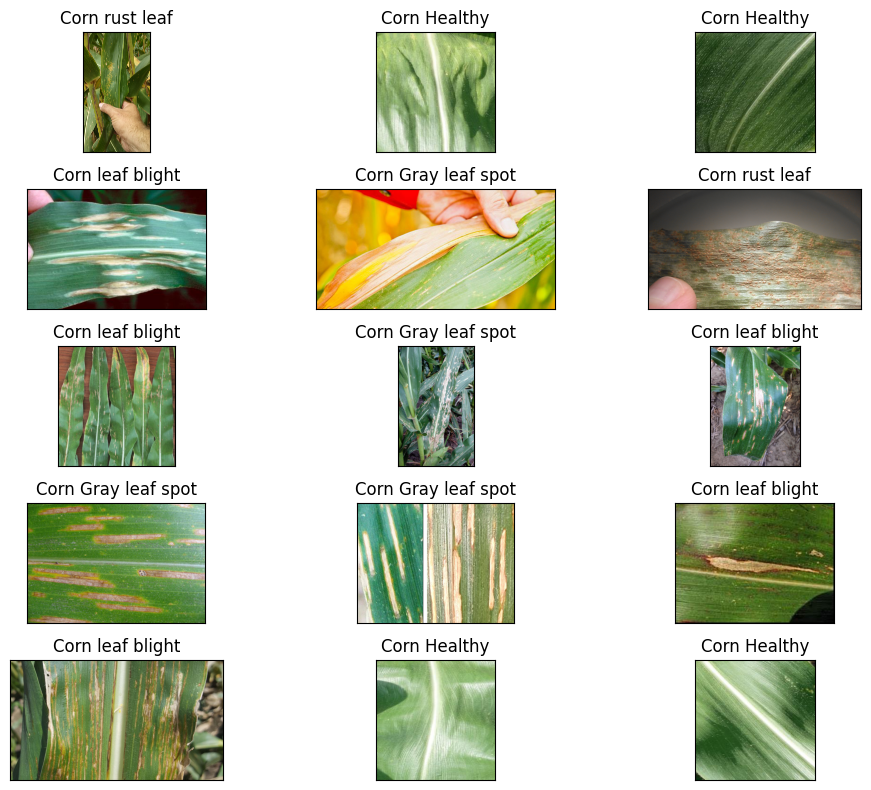

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 415 validated image filenames belonging to 4 classes.
Found 139 validated image filenames belonging to 4 classes.
Found 139 validated image filenames belonging to 4 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20
)

Epoch 1/20
13/13 [==============================] - 41s 3s/step - loss: 0.8154 - accuracy: 0.6723 - val_loss: 0.5322 - val_accuracy: 0.7698
Epoch 2/20
13/13 [==============================] - 35s 3s/step - loss: 0.2990 - accuracy: 0.8867 - val_loss: 0.4382 - val_accuracy: 0.8345
Epoch 3/20
13/13 [==============================] - 34s 3s/step - loss: 0.1686 - accuracy: 0.9422 - val_loss: 0.4518 - val_accuracy: 0.8273
Epoch 4/20
13/13 [==============================] - 36s 3s/step - loss: 0.0943 - accuracy: 0.9711 - val_loss: 0.4801 - val_accuracy: 0.8058
Epoch 5/20
13/13 [==============================] - 36s 3s/step - loss: 0.0650 - accuracy: 0.9880 - val_loss: 0.4894 - val_accuracy: 0.8129
Epoch 6/20
13/13 [==============================] - 37s 3s/step - loss: 0.0293 - accuracy: 0.9976 - val_loss: 0.5061 - val_accuracy: 0.8345
Epoch 7/20
13/13 [==============================] - 36s 3s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.5247 - val_accuracy: 0.8489
Epoch 8/20
13/13 [==

In [ ]:
model.save("model_resnet50.h5")  

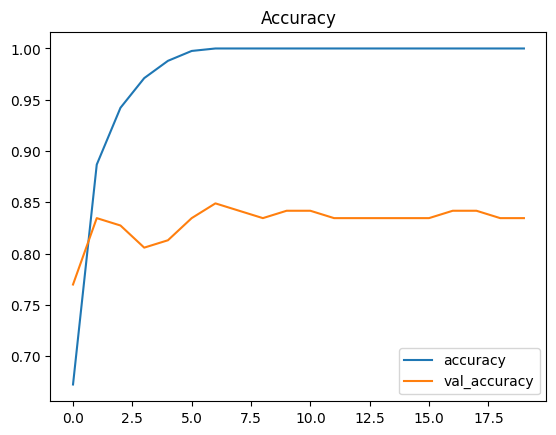

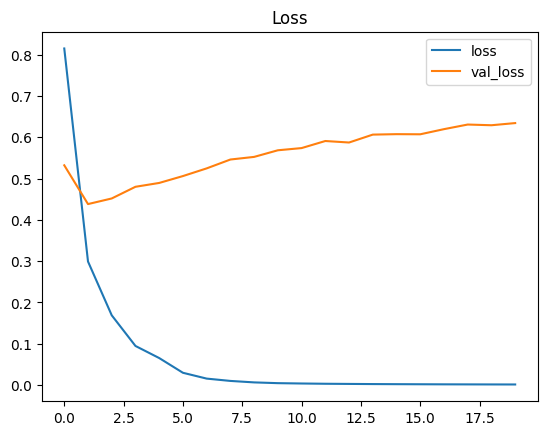

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.63454
Test Accuracy: 83.45%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

5/5 [==============================] - 13s 3s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

Corn Gray leaf spot       0.67      0.50      0.57        16
       Corn Healthy       0.98      1.00      0.99        56
   Corn leaf blight       0.71      0.83      0.76        41
     Corn rust leaf       0.82      0.69      0.75        26

           accuracy                           0.83       139
          macro avg       0.79      0.76      0.77       139
       weighted avg       0.83      0.83      0.83       139



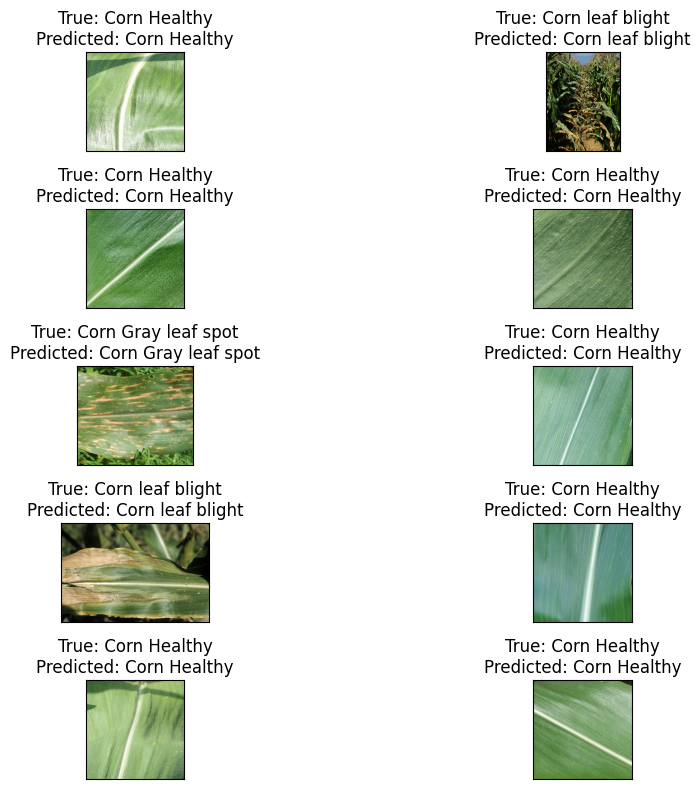

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()